# UTSA - CS 5243 - Computer Vision: Assignment-3

**Mao - Christopher - zbq615**


## Learning Objectives


*   Perform Image Classification on different datsets using Deep Learning.
*   Use PyTorch with GPUs available with Google Colab and your personal computer.
*   Design and run different Convolutional Neural Network (CNN) architectures using PyTorch.


## Tasks & Rubric

*   (05 points) GPU SETUP
    * Connect to Google Colab GPU runtime
    * (Optional) Connect to your local computer GPU runtime
    * Check and print GPU availability status
*   (15 points) DATA SETUP
    * Dataset loading as train set, validation set, and test set.
    * Use batch loading and random shuffle.
    * Show some dataset images in a single grid of 5*5 as examples.
    * Apply the above pipeline on three (3) different datasets for image classification
        * FashionMNIST
        * CIFAR100
        * Any other dataset (except MNISTs or CIFAR)
*   (25 points) CNN MODEL
    * Design a CNN model class
    * Print the model summary
    * Apply the above pipeline using three (3) different CNN ARCHITECTURES. **You MUST design it on your own and not use the built-in architecture functions**. Examples - LeNet, VGG, GoogleNet, ResNet.
*   (20 points) TRAINING
    * Create the Train loop with Loss Function and Optimizer.
    * Save the model at each epoch.
    * Calculate the Train and Validation loss / accuracy, save them in a list and plot a graph at the end of the train loop.
*   (10 points)
    * Create the Test loop.
    * First load the saved trained model and use that for testing.
    * Calculate and print the Test loss / accuracy.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision import datasets
import torch
from torchvision import transforms as T
from torch.utils.data import Dataset
from torchvision.io import read_image
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
#datasets.
#module, conv2d, lossfn, dataloader

###GPU SETUP
Connect to Google Colab GPU runtime
Check and print GPU availability status

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("GPU is available.")
else:
  device = torch.device("cpu")
  print("GPU is not available.")

print(f"Current device: {device}")

GPU is available.
Current device: cuda


###Dataset Setup
Set up 3 datasets (FashionMNIST, CIFAR100, and any other) for image classification:
1. Load as train, validation, and test set.
2. Use batch loading and random shuffle.
3. Show some images in a 5x5 grid.

In [ ]:
# Desai notes
'''
class MyDataset (Dataset):
  def __init__(self, img_dir, labels, transforms):
    self.img_dir = img_dir
    self.labels = labels
    self.transforms = transforms
  def __len__(self):
    return len(self.image_labels)
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, '/%d.jpg'%idx)
    image = read_image(img_path)
    label1 = self.img_labels[idx]
    image = self.transform(image)
    return image, label


transform = []
transform.append(T.RandomHorizontalFlip())
transform.append(T.RandomAffine(degrees=5, scale=(0.9, 1.1)))
transform.append(T.ToTensor())
transform = T.Compose(transform)


dataset = MyDataset(img_dir, labels, transform)

train_dataloader = data.Dataloader(dataset, batch_size=batch_size, shuffle=True, num_workers=1)

import os
import torch
from torch import nn

class MyNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
    self.relu = nn.ReLU()
    self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    return x
'''

100%|██████████| 26421880/26421880 [00:01<00:00, 13429985.96it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201508.09it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3783356.44it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7806318.51it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



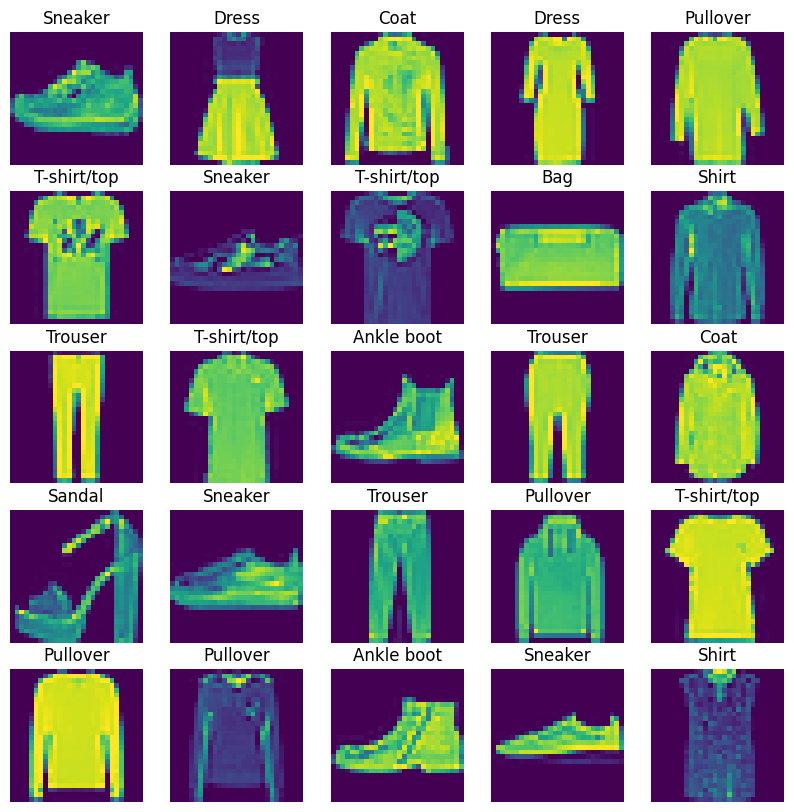

In [ ]:
## FashionMNIST Dataset loading as train set, validation set, and test set.

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize for FashionMNIST
])

# Load the FashionMNIST dataset
train_dataset_mnist = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset_mnist = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets
train_size_mnist = int(0.8 * len(train_dataset_mnist))
val_size_mnist = len(train_dataset_mnist) - train_size_mnist
train_dataset_mnist, val_dataset_mnist = random_split(train_dataset_mnist, [train_size_mnist, val_size_mnist])

# Create data loaders for training, validation, and testing
batch_size = 64
train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=batch_size, shuffle=True)
val_loader_mnist = DataLoader(val_dataset_mnist, batch_size=batch_size, shuffle=False)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=batch_size, shuffle=False)

# Show some dataset images in a 5x5 grid
def show_images(images, labels, classes):
  plt.figure(figsize=(10, 10))
  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0))) # pytorch (C,H,W) to matplotlib (H,W,C)
    plt.title(classes[labels[i]])
    plt.axis('off')
  plt.show()

# Get a batch of images and labels
images_mnist, labels_mnist = next(iter(train_loader_mnist))
classes_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show the images
show_images(images_mnist, labels_mnist, classes_mnist)

100%|██████████| 169001437/169001437 [00:03<00:00, 43326880.33it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


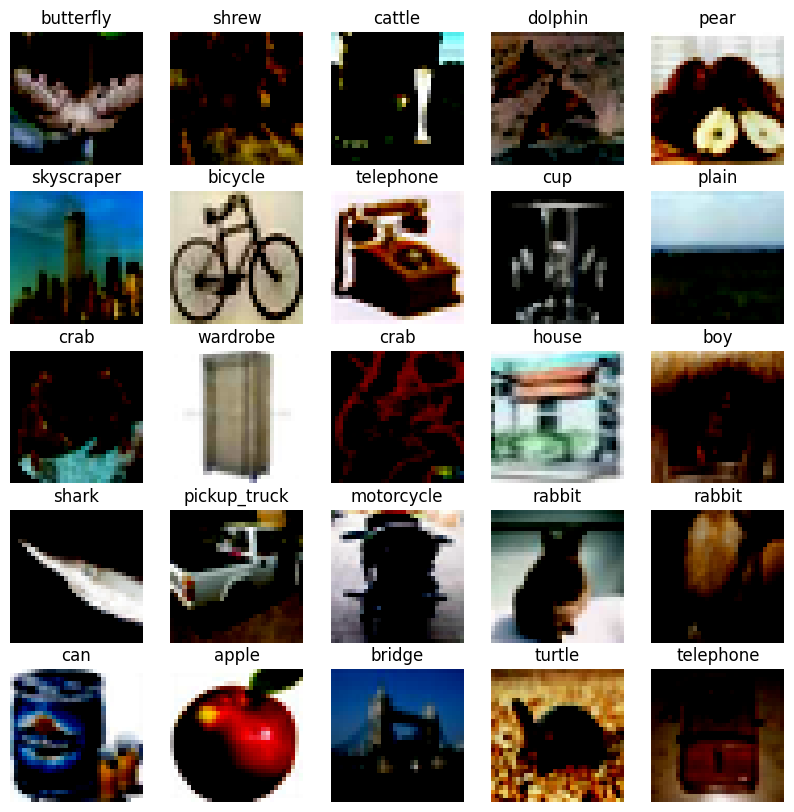

In [ ]:
# CIFAR100 Dataset loading as train set, validation set, and test set.

# Define transformations for the dataset
transform_cifar = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for CIFAR100
])

# Load the CIFAR100 dataset
train_dataset_cifar = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_cifar)
test_dataset_cifar = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_cifar)

# Split the training dataset into training and validation sets
train_size_cifar = int(0.8 * len(train_dataset_cifar))
val_size_cifar = len(train_dataset_cifar) - train_size_cifar
train_dataset_cifar, val_dataset_cifar = random_split(train_dataset_cifar, [train_size_cifar, val_size_cifar])

# Create data loaders for training, validation, and testing
batch_size_cifar = 64
train_loader_cifar = DataLoader(train_dataset_cifar, batch_size=batch_size_cifar, shuffle=True)
val_loader_cifar = DataLoader(val_dataset_cifar, batch_size=batch_size_cifar, shuffle=False)
test_loader_cifar = DataLoader(test_dataset_cifar, batch_size=batch_size_cifar, shuffle=False)

# Get a batch of images and labels
images_cifar, labels_cifar = next(iter(train_loader_cifar))

# Load CIFAR100 class names
import pickle
with open('./data/cifar-100-python/meta', 'rb') as f:
  meta = pickle.load(f, encoding='bytes')
classes_cifar = [x.decode('utf-8') for x in meta[b'fine_label_names']]

# Show the images
show_images(images_cifar, labels_cifar, classes_cifar)


100%|██████████| 6579383/6579383 [00:01<00:00, 5272364.94it/s]


100%|██████████| 1831726/1831726 [00:00<00:00, 1909468.61it/s]


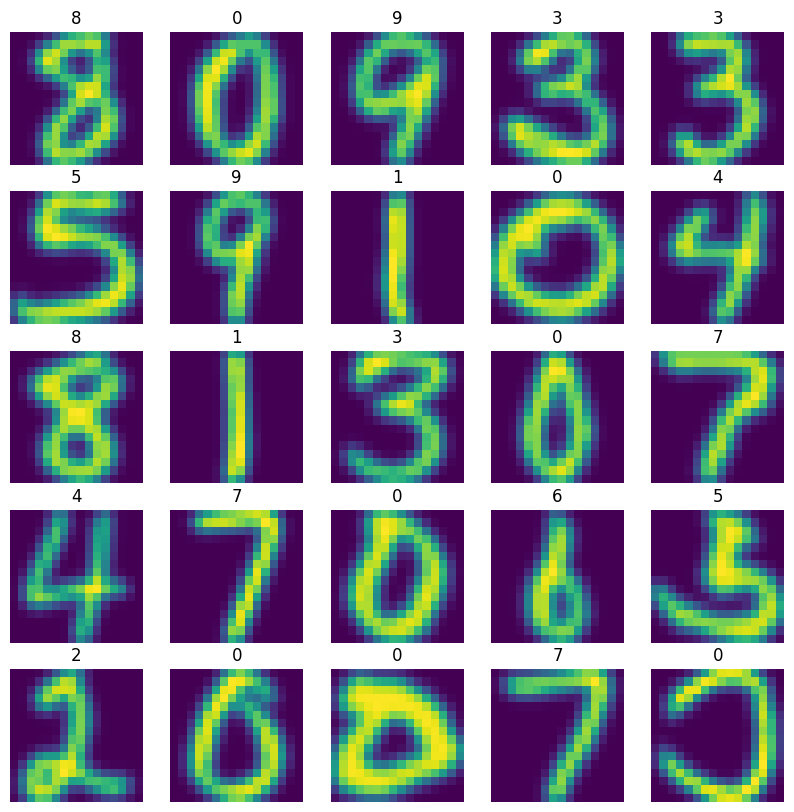

In [ ]:
## USPS Dataset loading as train set, validation set, and test set.

# Load the USPS dataset
train_dataset_USPS = datasets.USPS(root='./data', train=True, download=True, transform=transform)
test_dataset_USPS = datasets.USPS(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets
train_size_USPS = int(0.8 * len(train_dataset_USPS))
val_size_USPS = len(train_dataset_USPS) - train_size_USPS
train_dataset_USPS, val_dataset_USPS = random_split(train_dataset_USPS, [train_size_USPS, val_size_USPS])

# Create data loaders for training, validation, and testing
batch_size = 64
train_loader_USPS = DataLoader(train_dataset_USPS, batch_size=batch_size, shuffle=True)
val_loader_USPS = DataLoader(val_dataset_USPS, batch_size=batch_size, shuffle=False)
test_loader_USPS = DataLoader(test_dataset_USPS, batch_size=batch_size, shuffle=False)

# Get a batch of images and labels
images_USPS, labels_USPS = next(iter(train_loader_USPS))
classes_USPS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Show the images
show_images(images_USPS, labels_USPS, classes_USPS)

###CNN MODEL
Apply to 3 different CNN architectures. Ex- LeNet, VGG, GoogleNet, and ResNet.
1. Design a CNN model class
2. Print the model summary

In [ ]:
# My model - FashionMNIST = 1x28x28

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

my_model_mnist = CNNModel(num_classes=10)
print(my_model_mnist)


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# LeNet - Cifar100 = 3x32x32
class LeNet(nn.Module):
    def __init__(self, num_classes):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.AvgPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x

lenet_model_cifar = LeNet(num_classes=100)
print(lenet_model_cifar)

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=100, bias=True)
)


In [ ]:
# VGG - USPS = 1x16x16

class VGG(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(1024, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

vgg_model_USPS = VGG(num_classes=10)
print(vgg_model_USPS)


VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

###Training
1. Create the Train loop with loss function and optimizer
2. Save the model at each epoch
3. Calculate the train and validation
loss/accuracy, save them in a list, and plot a graph at the end of the train loop

Epoch 1/3, Train Loss: 0.4672, Train Accuracy: 83.08%
Epoch 1/3, Val Loss: 0.3300, Val Accuracy: 87.92%
Epoch 2/3, Train Loss: 0.2987, Train Accuracy: 89.07%
Epoch 2/3, Val Loss: 0.3081, Val Accuracy: 88.80%
Epoch 3/3, Train Loss: 0.2496, Train Accuracy: 90.74%
Epoch 3/3, Val Loss: 0.2540, Val Accuracy: 90.48%


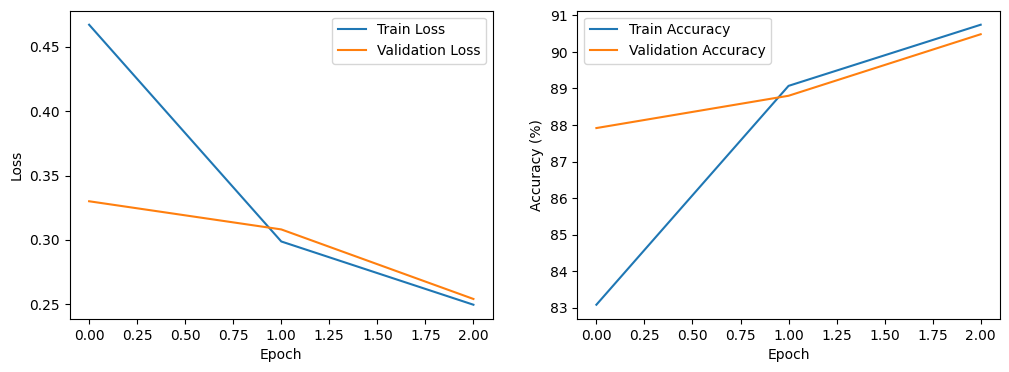

In [ ]:
# Choose a model
model_mnist = my_model_mnist.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mnist.parameters(), lr=0.001)

# Training loop
num_epochs = 3

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader_mnist, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model_mnist(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader_mnist)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validation
    model_mnist.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader_mnist:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_mnist(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader_mnist)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    # Save the model at each epoch
    torch.save(model_mnist.state_dict(), f"/content/drive/My Drive/model_MNIST_epoch_{epoch+1}.pth")

    model_mnist.train()  # Set the model back to training mode

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


In [ ]:
model_cifar = lenet_model_cifar.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cifar.parameters(), lr=0.001)

# Training loop
num_epochs = 3

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader_cifar, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model_cifar(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader_cifar)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validation
    model_cifar.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader_cifar:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_cifar(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader_cifar)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    # Save the model at each epoch
    torch.save(model_cifar.state_dict(), f"/content/drive/My Drive/model_cifar_epoch_{epoch+1}.pth")

    model_cifar.train()  # Set the model back to training mode

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


NameError: name 'lenet_model_cifar' is not defined

Epoch 1/3, Train Loss: 1.9931, Train Accuracy: 26.30%
Epoch 1/3, Val Loss: 1.2251, Val Accuracy: 53.94%
Epoch 2/3, Train Loss: 0.5999, Train Accuracy: 78.24%
Epoch 2/3, Val Loss: 0.3350, Val Accuracy: 90.75%
Epoch 3/3, Train Loss: 0.1742, Train Accuracy: 95.15%
Epoch 3/3, Val Loss: 0.2480, Val Accuracy: 93.83%


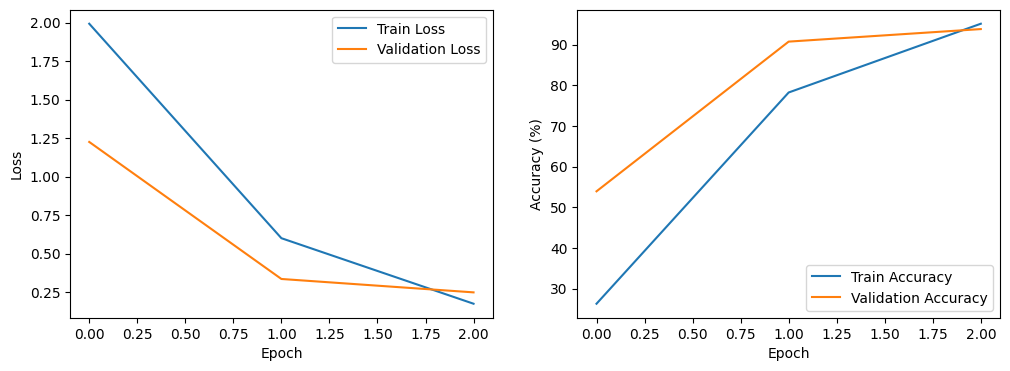

In [ ]:
model_USPS = vgg_model_USPS.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_USPS.parameters(), lr=0.001)

# Training loop
num_epochs = 3

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader_USPS, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model_USPS(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader_USPS)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validation
    model_USPS.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader_USPS:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_USPS(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader_USPS)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    # Save the model at each epoch
    torch.save(model_USPS.state_dict(), f"/content/drive/My Drive/model_USPS_epoch_{epoch+1}.pth")

    model_USPS.train()  # Set the model back to training mode

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


###Testing
1. Create the Test loop.
2. First load the saved trained model and use that for testing.
3. Calculate and print the Test loss / accuracy.

In [ ]:
# Load the saved model
model_mnist.load_state_dict(torch.load('/content/drive/My Drive/model_MNIST_epoch_3.pth'))  # Replace with your saved model path

# Set the model to evaluation mode
model_mnist.eval()

# Testing loop
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader_mnist:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_mnist(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader_mnist)
test_accuracy = 100 * test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


<ipython-input-91-9f38e83f36a5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_mnist.load_state_dict(torch.load('/content/drive/My Drive/model_MNIST_epoch_3.pth'))  

Test Loss: 0.2673, Test Accuracy: 89.95%


In [ ]:
model_cifar.load_state_dict(torch.load('/content/drive/My Drive/model_cifar_epoch_3.pth'))  # Replace with your saved model path

model_cifar.eval()

test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader_cifar:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_cifar(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader_cifar)
test_accuracy = 100 * test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


<ipython-input-92-0f334abc9f42>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_cifar.load_state_dict(torch.load('/content/drive/My Drive/model_cifar_epoch_3.pth'))  

Test Loss: 3.4244, Test Accuracy: 18.27%


In [ ]:
model_USPS.load_state_dict(torch.load('/content/drive/My Drive/model_USPS_epoch_3.pth'))  # Replace with your saved model path

model_USPS.eval()

test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader_USPS:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_USPS(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader_USPS)
test_accuracy = 100 * test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


<ipython-input-93-769211f3c179>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_USPS.load_state_dict(torch.load('/content/drive/My Drive/model_USPS_epoch_3.pth'))  # 

Test Loss: 0.3467, Test Accuracy: 90.38%


#Submission Instructions



1.   Complete all tasks according to the rubric
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Canvas

